
# Project: Investigate a Dataset - [No-show-appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
In this dataset it provide data about patients who registered an appointment like :
-Neibourhood : the location of the hospital 
the day that the appointment should happen 
and if the patient showed up for the appointment or not
and about the problems the patient have (hipertension,diabetes,..etc)

### Question(s) for Analysis
1-what are the factors that can affect a patient to predict whether he will show up for the appointment or not ?
2-what is the most common neibourhood ?

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
%matplotlib notebook

<a id='wrangling'></a>
## Data Wrangling


In [3]:
df=pd.read_csv('noshow.csv')
df=pd.DataFrame(df)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
in this step I will check the missing values then the duplicated rows then the data types
 

In [4]:
df.info()
df.isnull().sum()#seems that the data has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
df.duplicated().value_counts()#looks like there is no duplicated rows 

False    110527
dtype: int64

In [6]:
df.dtypes#looks that all data types is good except the 'ScheduledDay' and 'AppointmentDay' need to be converted to
         # date and time 


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.dtypes#now it has been converted

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [8]:
#renaming the column No-show to No_show for easier usage 
df.rename({'No-show':'No_show'},axis=1,inplace=True)
df.columns#all the other column names are good

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

### what factors can affect a patient to know whether he will show up for his appointment or not
firstly I will split the dataframe into two other according to the No_show column to answer the question to make 
the analysis process easiear 


<IPython.core.display.Javascript object>


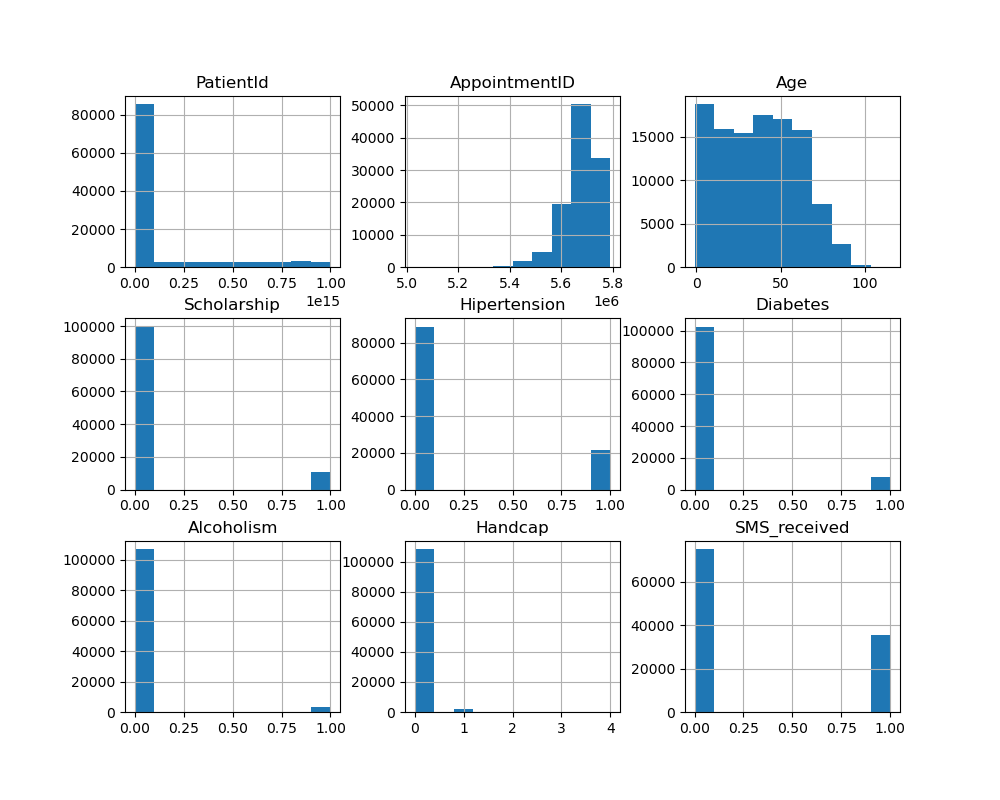

In [9]:
#lets see how the data will look in histograms 
df.hist(figsize=(10,8));

In [10]:
df.describe()#lets summarize the data statistics

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
no_show = df[df['No_show']=='Yes']
showed = df[df['No_show']=='No']

then I will start to check the relation between different variables and the No_show variable to see their effect on it

In [12]:
print('the average age of patients who did not go to the appointment :',no_show['Age'].mean())
print('the average age of patients who did go to the appointment :',showed['Age'].mean())


the average age of patients who did not go to the appointment : 34.31766656212196
the average age of patients who did go to the appointment : 37.790064393252315


In [14]:
def factors_mean(no_show,showed):
    factors=['Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
    for factor in factors:
        print('\nthe average of the patients who had {} and did not go to the appointment :'.format(factor),no_show[factor].mean())
        print('the average of patients who had {} and did go to the appointment :'.format(factor),showed[factor].mean())
       

In [15]:
factors_mean(no_show,showed)


the average of the patients who had Scholarship and did not go to the appointment : 0.11550696715802679
the average of patients who had Scholarship and did go to the appointment : 0.09390304734264465

the average of the patients who had Hipertension and did not go to the appointment : 0.16900398763385457
the average of patients who had Hipertension and did go to the appointment : 0.20439189189189189

the average of the patients who had Diabetes and did not go to the appointment : 0.06407097092163627
the average of patients who had Diabetes and did go to the appointment : 0.0738368401959006

the average of the patients who had Alcoholism and did not go to the appointment : 0.030332900219543886
the average of patients who had Alcoholism and did go to the appointment : 0.030416742245601307

the average of the patients who had Handcap and did not go to the appointment : 0.02029660827097988
the average of patients who had Handcap and did go to the appointment : 0.022741701432976602

the av

In [16]:
print('the number of each gender who did not go to the appointment :\n',no_show['Gender'].value_counts())
print('the number of each gender who did go to the appointment :\n',showed['Gender'].value_counts())


the number of each gender who did not go to the appointment :
 F    14594
M     7725
Name: Gender, dtype: int64
the number of each gender who did go to the appointment :
 F    57246
M    30962
Name: Gender, dtype: int64


looks like that the factors affecting whether the pateint show up at the appointment so far is :

-Age : the higher the age the more likely he will come

-scholarship : when he have scholarship the more likely he will not come but it is not a strong factor just 1 out of 10

-Hipertension : when he have hipertension the more likely he will come

-diabetes : when he have diabetes the more likely he will come

-handcap : when he have handcap the more likely he will come


alcholism is not considered a factor because of the very small difference between the two averages of it
Gender is not a factor because its the same difference between each gender in both cases 

-SMS is not considered a factor because it makes no sense when a patient recieve a SMS to remind him of his appointment 
he should come but according to this data set the opposite is what happening , So there has been an error in the information in that column

 now I will add another factor called 'came_before' to check whether a patient came before or not and its effect on his 
 decision of coming again 

<IPython.core.display.Javascript object>


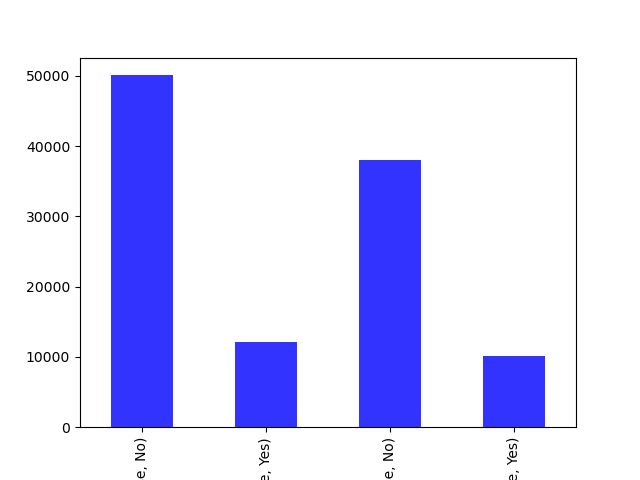

came_before  No_show
False        No         50106
             Yes        12193
True         No         38102
             Yes        10126
Name: No_show, dtype: int64

In [17]:
df['came_before']=df.duplicated(subset=['PatientId'])
df.groupby('came_before')['No_show'].value_counts().plot(kind='bar',alpha=.8,color='blue');
df.groupby('came_before')['No_show'].value_counts()

it seems that it can be considered a factor but not a strong one as if its the patient first time the more likely he wont come 

what is the most common Neibourhood?

In [18]:
df['Neighbourhood'].mode()[0]

'JARDIM CAMBURI'

the most common Neibourhood that patients go to is JARDIM CAMBURI


now the final conclusion with visualisations of the factors affecting whether a patient will show up for the appointmet or not

<IPython.core.display.Javascript object>


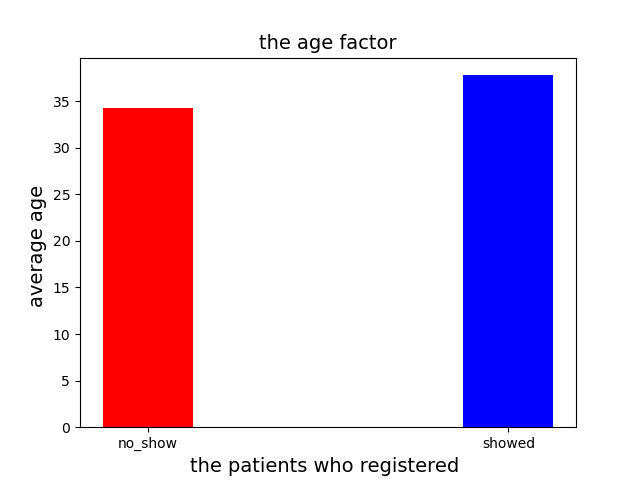

No_show
No     37.790064
Yes    34.317667
Name: Age, dtype: float64

In [20]:
#we start with the age 
loc=[1,2]
hei=[no_show['Age'].mean(),showed['Age'].mean()]
color=['red','blue']
plt.bar(loc,hei,width=.25,color=color,tick_label=['no_show','showed'])
plt.xlabel('the patients who registered ',fontsize=14)
plt.ylabel('average age ',fontsize=14)
plt.title('the age factor',fontsize=14)
df.groupby('No_show')['Age'].mean()

<IPython.core.display.Javascript object>


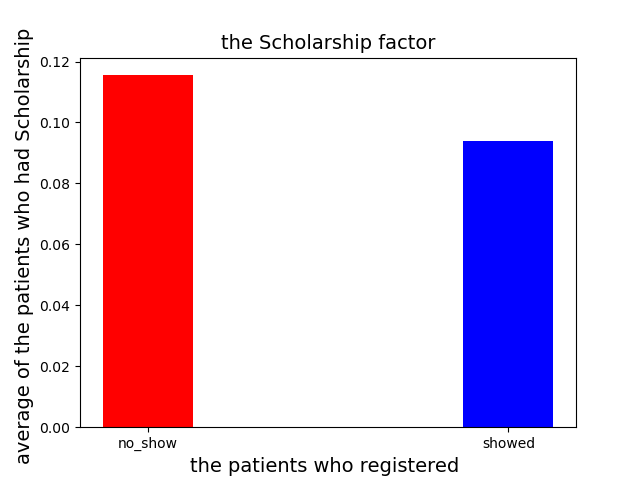

No_show
No     0.093903
Yes    0.115507
Name: Scholarship, dtype: float64

In [22]:
loc=[1,2]
hei=[no_show['Scholarship'].mean(),showed['Scholarship'].mean()]
color=['red','blue']
plt.bar(loc,hei,width=.25,color=color,tick_label=['no_show','showed'])
plt.xlabel('the patients who registered ',fontsize=14)
plt.ylabel('average of the patients who had Scholarship ',fontsize=14)
plt.title('the Scholarship factor',fontsize=14)
df.groupby('No_show')['Scholarship'].mean()

<IPython.core.display.Javascript object>


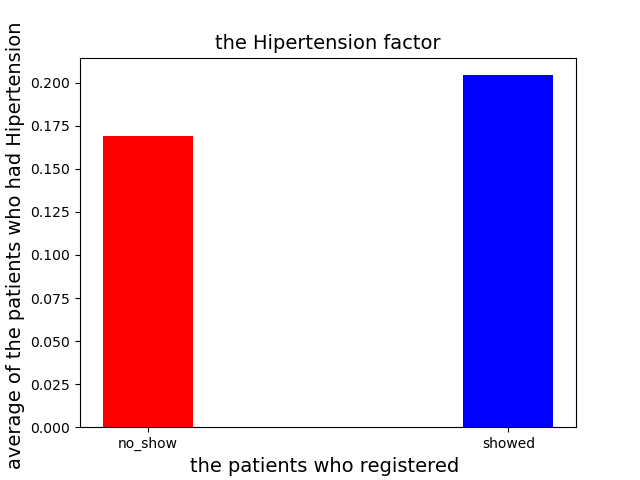

No_show
No     0.204392
Yes    0.169004
Name: Hipertension, dtype: float64

In [23]:
loc=[1,2]
hei=[no_show['Hipertension'].mean(),showed['Hipertension'].mean()]
color=['red','blue']
plt.bar(loc,hei,width=.25,color=color,tick_label=['no_show','showed'])
plt.xlabel('the patients who registered ',fontsize=14)
plt.ylabel('average of the patients who had Hipertension ',fontsize=14)
plt.title('the Hipertension factor',fontsize=14)
df.groupby('No_show')['Hipertension'].mean()

<IPython.core.display.Javascript object>


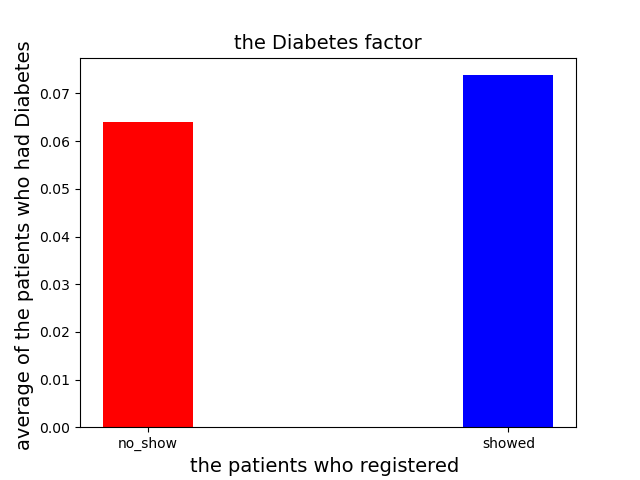

No_show
No     0.073837
Yes    0.064071
Name: Diabetes, dtype: float64

In [24]:
loc=[1,2]
hei=[no_show['Diabetes'].mean(),showed['Diabetes'].mean()]
color=['red','blue']
plt.bar(loc,hei,width=.25,color=color,tick_label=['no_show','showed'])
plt.xlabel('the patients who registered ',fontsize=14)
plt.ylabel('average of the patients who had Diabetes ',fontsize=14)
plt.title('the Diabetes factor',fontsize=14)
df.groupby('No_show')['Diabetes'].mean()

<IPython.core.display.Javascript object>


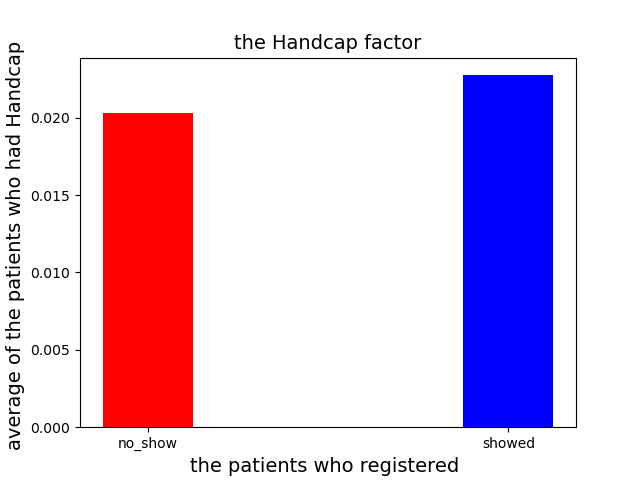

No_show
No     0.022742
Yes    0.020297
Name: Handcap, dtype: float64

In [25]:
loc=[1,2]
hei=[no_show['Handcap'].mean(),showed['Handcap'].mean()]
color=['red','blue']
plt.bar(loc,hei,width=.25,color=color,tick_label=['no_show','showed'])
plt.xlabel('the patients who registered ',fontsize=14)
plt.ylabel('average of the patients who had Handcap ',fontsize=14)
plt.title('the Handcap factor',fontsize=14)
df.groupby('No_show')['Handcap'].mean()

<a id='conclusions'></a>
## Conclusions
In the end, My final conclusion that the more old the patient is the more likely he will show up for the appointment .
Also the more problems the patient has the more likely he will show up for the appointment .
But the percentage might change if it was his first registration .


### Limitations
there is one limitation that was about lack of information in the 'SMS_recieved' column like how many messages the patient recieved because the current information did not make sense

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1